# HANDWRITTEN SIGNATURE FORGERY DETECTION USING CNN

# I. Import Libraries

In [1]:
# Import Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import copy
import tensorflow as tf
import os
import zipfile
import cv2
import glob
import shutil
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint
from tensorflow.keras.preprocessing import image
from tensorflow.keras.utils import load_img
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D,Dense, Dropout, Flatten, BatchNormalization 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings('ignore') 

# II. Data Loading

In [ ]:
# DATA COLLECTION
#C:\Users\saiyo\Downloads\archive (1)\BHSig160_Hindi\Genuine
#C:\Users\saiyo\Downloads\archive (1)\BHSig160_Hindi\Forged
gen_train =   [glob.glob('C:/Users/logav/Downloads/Signature/Dataset_Signature_Final/Dataset/dataset1/real/*.*'),
              glob.glob('C:/Users/logav/Downloads/Signature/Dataset_Signature_Final/Dataset/dataset2/real/*.*'),
              glob.glob('C:/Users/logav/Downloads/Signature/Dataset_Signature_Final/Dataset/dataset3/real/*.*'),
              glob.glob('C:/Users/logav/Downloads/Signature/Dataset_Signature_Final/Dataset/dataset4/real/*.*'),
              glob.glob('C:/Users/logav/Downloads/Signature/sample_Signature/sample_Signature/genuine/*.*')]
                 
forge_train = [glob.glob('C:/Users/logav/Downloads/Signature/Dataset_Signature_Final/Dataset/dataset1/forge/*.*'),
              glob.glob('C:/Users/logav/Downloads/Signature/Dataset_Signature_Final/Dataset/dataset2/forge/*.*'),
              glob.glob('C:/Users/logav/Downloads/Signature/Dataset_Signature_Final/Dataset/dataset3/forge/*.*'),
              glob.glob('C:/Users/logav/Downloads/Signature/Dataset_Signature_Final/Dataset/dataset4/forge/*.*'),
              glob.glob('C:/Users/logav/Downloads/Signature/sample_signature/sample_Signature/forged/*.*')]

# III. Exploratory Data Analysis

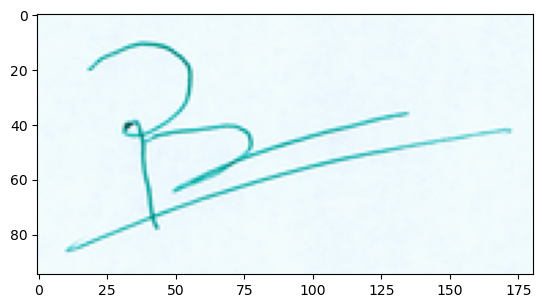

In [3]:
# GRAPH IMAGE OF THE FORGED DATA
import matplotlib.pyplot as plt
img = plt.imread('C:/Users/logav/Downloads/Signature/Dataset_Signature_Final/Dataset/dataset1/forge/02102005.png')
plt.imshow(img)

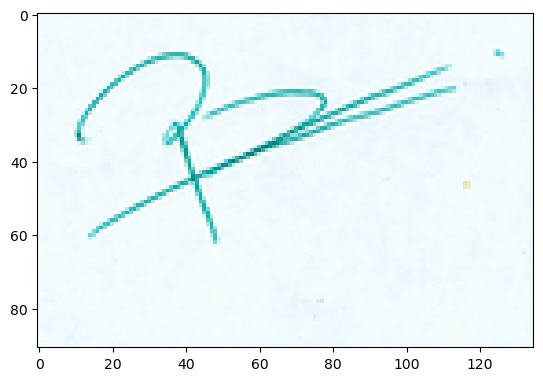

In [4]:
# GRAPH IMAGE OF THE GENUINE DATA
import matplotlib.pyplot as plt
img = plt.imread('C:/Users/logav/Downloads/Signature/Dataset_Signature_Final/Dataset/dataset1/real/00500005.png')
plt.imshow(img)

In [5]:
# TRAINING FILE GENUINE IMAGE COUNT
count_real = 0

for root_dir, cur_dir, files in os.walk(r'C:/Users/logav/Downloads/Signature/Dataset_Signature_Final/Dataset/dataset1/real'):
    count_real += len(files)
for root_dir, cur_dir, files in os.walk(r'C:/Users/logav/Downloads/Signature/Dataset_Signature_Final/Dataset/dataset2/real'):
    count_real += len(files)
for root_dir, cur_dir, files in os.walk(r'C:/Users/logav/Downloads/Signature/Dataset_Signature_Final/Dataset/dataset3/real'):
    count_real += len(files)
for root_dir, cur_dir, files in os.walk(r'C:/Users/logav/Downloads/Signature/Dataset_Signature_Final/Dataset/dataset4/real'):
    count_real += len(files)

print('real signature file count in training:', count_real)

real signature file count in training: 270


In [6]:
# TRAINING FILE FORGED IMAGE COUNT
count_forge = 0

for root_dir, cur_dir, files in os.walk(r'C:/Users/logav/Downloads/Signature/Dataset_Signature_Final/Dataset/dataset1/forge'):
    count_forge += len(files)
for root_dir, cur_dir, files in os.walk(r'C:/Users/logav/Downloads/Signature/Dataset_Signature_Final/Dataset/dataset2/forge'):
    count_forge += len(files)
for root_dir, cur_dir, files in os.walk(r'C:/Users/logav/Downloads/Signature/Dataset_Signature_Final/Dataset/dataset3/forge'):
    count_forge += len(files)
for root_dir, cur_dir, files in os.walk(r'C:/Users/logav/Downloads/Signature/Dataset_Signature_Final/Dataset/dataset4/forge'):
    count_forge += len(files)

print('forge signature file count in training:', count_forge)

forge signature file count in training: 360


In [7]:
# SAMPLE FILE GENUINE IMAGE COUNT
count_real = 0

for root_dir, cur_dir, files in os.walk(r'C:/Users/logav/Downloads/Signature/sample_Signature/sample_Signature/genuine'):
    count_real += len(files)

print('real signature file count in Testing:', count_real)

real signature file count in Testing: 150


In [8]:
# SAMPLE FILE FORGED IMAGE COUNT
count_forge = 0
for root_dir, cur_dir, files in os.walk(r'C:/Users/logav/Downloads/Signature/sample_Signature/sample_Signature/forged'):
    count_forge += len(files)

print('forge signature file count in training:', count_forge)

forge signature file count in training: 150


Text(0.5, 1.0, 'Grayscale image with cmap')

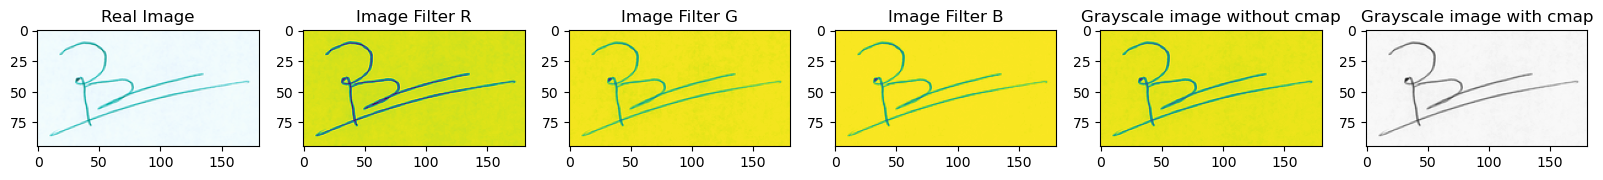

In [9]:
# CHECKING THROUGH DIFFERENT COLOR LAYERS
img = cv2.imread('C:/Users/logav/Downloads/Signature/Dataset_Signature_Final/Dataset/dataset1/forge/02102005.png')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

Red = img_rgb[:,:,0]
Green = img_rgb[:,:,1]
Blue = img_rgb[:,:,2]
Grey = 0.299*Red + 0.587*Green + 0.114*Blue

# Graph RGB & Greyscale
fig, ax = plt.subplots(ncols=6,figsize=(20,5))
ax[0].imshow(img_rgb)
ax[0].set_title('Real Image')
ax[1].imshow(Red)
ax[1].set_title('Image Filter R')
ax[2].imshow(Green)
ax[2].set_title('Image Filter G')
ax[3].imshow(Blue)
ax[3].set_title('Image Filter B')
ax[4].imshow(Grey)
ax[4].set_title('Grayscale image without cmap')
ax[5].imshow(Grey, cmap='gray')
ax[5].set_title('Grayscale image with cmap')

Text(0.5, 1.0, 'Real Image Resized 256x256')

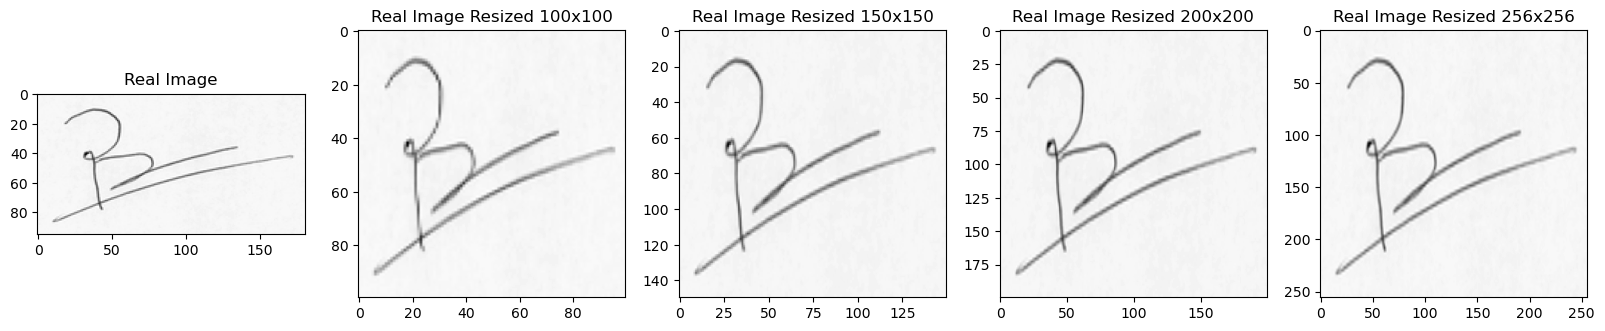

In [10]:
# Checking through different image sizes
img = cv2.imread('C:/Users/logav/Downloads/Signature/Dataset_Signature_Final/Dataset/dataset1/forge/02102005.png')
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img_res100 = cv2.resize(img_gray, dsize=(100, 100))
img_res150 = cv2.resize(img_gray, dsize=(150, 150))
img_res200 = cv2.resize(img_gray, dsize=(200, 200))
img_res256 = cv2.resize(img_gray, dsize=(256, 256))

# Graph image
fig, ax = plt.subplots(ncols=5,figsize=(20,5))
ax[0].imshow(img_gray, cmap='gray')
ax[0].set_title('Real Image')
ax[1].imshow(img_res100, cmap='gray')
ax[1].set_title('Real Image Resized 100x100')
ax[2].imshow(img_res150, cmap='gray')
ax[2].set_title('Real Image Resized 150x150')
ax[3].imshow(img_res200, cmap='gray')
ax[3].set_title('Real Image Resized 200x200')
ax[4].imshow(img_res256, cmap='gray')
ax[4].set_title('Real Image Resized 256x256')

In the exploratory data analysis (EDA) we have found out that:
- The train image files consist of inequal numbers of genuine and forged signature image.
- The test image also files consist of inequal numbers of genuine and forged signature image.
- RGB filter does not show much difference for image colors, and grayscale seems to show better visibility for the image, which help with our classification model. We will be using grayscale as our image format color.
- We will be resizing image size to 256 x 256 for better visibility.

# IV. Data Preprocessing

#### **Giving Label to Data**

In [11]:
#GIVIVNG LABEL TO THE DATA
data = []
labels = []

for a in range(len(gen_train)):
    for i in gen_train[a]:   
        image=load_img(i, color_mode='grayscale', 
        target_size= (256,256))
        image=np.array(image)
        image=np.repeat(image[..., np.newaxis], 3, -1)
        data.append(image)
        labels.append(0)
for a in range(len(forge_train)):
    for i in forge_train[a]:      
        image=load_img(i, color_mode='grayscale', 
        target_size= (256,256))
        image=np.array(image)
        image=np.repeat(image[..., np.newaxis], 3, -1)
        data.append(image)
        labels.append(1)


data = np.array(data)
labels = np.array(labels)

In [12]:
# TURNING LABELS TO DATAFRAME
df_labels = pd.DataFrame(labels,columns=['labels'])

In [13]:
# DISPLAYING LABEL DATAFRAME
df_labels

,labels
0,0
1,0
2,0
3,0
4,0
...,...
925,1
926,1
927,1
928,1


In [14]:
# NORMALIZATION OF THE DATA
data = data/255

#### **Get Inference Data**

In [15]:
# GETIING THE DATA FOR INFERENCE OF THE MODEL

x_train_test, x_inf,  y_train_test, y_inf = train_test_split(data, df_labels, shuffle=True, test_size=0.01,random_state=26)

In [16]:
# SHAPE CHECKING DATA INFERENTIAL
y_inf

,labels
4,0
272,0
350,0
105,0
130,0
222,0
136,0
506,1
665,1
328,0


#### **Split Data into Train, Validation, and Test Data**

In [17]:
# SPLITTING THE DATAS AS TRAIN, TEST AND VALIDATION
x_train_full, x_test,  y_train_full, y_test = train_test_split(x_train_test, y_train_test, shuffle=True, test_size=0.2,random_state=26)

x_train, x_val, y_train, y_val = train_test_split(x_train_full, y_train_full, shuffle=True, test_size=0.2,random_state=26)

print("Training data shape: {}".format(x_train.shape))
print("Validation data shape: {}".format(x_val.shape))
print("Testing data shape: {}".format(x_test.shape))

Training data shape: (588, 256, 256, 3)
Validation data shape: (148, 256, 256, 3)
Testing data shape: (184, 256, 256, 3)


#### **Image Preprocessing**

In [18]:
# PREPROCESSING THE TRAINING DATASET
train_datagen = ImageDataGenerator(
    rotation_range=30,
    fill_mode='nearest',
    width_shift_range=0.2,
    height_shift_range=0.2,
    brightness_range=[0.4,1.5],
    zoom_range=0.3
    )

val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# VI. Model Definition

The model that we will be using is CNN Model because we are doing image classification and CNN is one of the common algorithm to use for image classification. 

#### **A. Model CNN I**


In [19]:
# BUILDING THE CNN MODEL
cnn_model = Sequential()

cnn_model.add(Conv2D(16,(3,3),input_shape=(256,256,3),activation='relu'))
cnn_model.add(MaxPooling2D(3,3))
cnn_model.add(Dropout(0.25))

cnn_model.add(Conv2D(32,(3,3),activation='relu'))
cnn_model.add(MaxPooling2D(2,2))
cnn_model.add(Dropout(0.25))

cnn_model.add(Conv2D(64,(3,3),activation='relu'))
cnn_model.add(MaxPooling2D(2,2))
cnn_model.add(Dropout(0.25))

cnn_model.add(Conv2D(128,(3,3),activation='relu'))
cnn_model.add(MaxPooling2D(2,2))
cnn_model.add(Dropout(0.25))

cnn_model.add(Flatten())
cnn_model.add(Dense(128, activation='relu'))
cnn_model.add(BatchNormalization())
cnn_model.add(Dropout(0.25))
cnn_model.add(Dense(1, activation='sigmoid'))

cnn_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
cnn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 84, 84, 16)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 84, 84, 16)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 82, 82, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 41, 41, 32)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 41, 41, 32)        0

In [20]:
# DEFINITION CALLBACK
es_cnn = [EarlyStopping(monitor='val_loss', verbose=1,patience=10,restore_best_weights=True)]

# VII. Model Training

#### **A. Model CNN I**

In [21]:
# TRAINING THE MODEL
hist_cnn =  cnn_model.fit(x_train,y_train,batch_size=32,
            validation_data=(x_val,y_val),validation_batch_size=32,
            epochs=100,callbacks=es_cnn)

Epoch 1/100
19/19 [==============================] - 28s 1s/step - loss: 0.8452 - accuracy: 0.5510 - val_loss: 1.1155 - val_accuracy: 0.5405
Epoch 2/100
19/19 [==============================] - 22s 1s/step - loss: 0.7202 - accuracy: 0.5442 - val_loss: 0.7772 - val_accuracy: 0.6149
Epoch 3/100
19/19 [==============================] - 21s 1s/step - loss: 0.6099 - accuracy: 0.6173 - val_loss: 0.6074 - val_accuracy: 0.6284
Epoch 4/100
19/19 [==============================] - 21s 1s/step - loss: 0.5822 - accuracy: 0.6786 - val_loss: 0.5956 - val_accuracy: 0.6622
Epoch 5/100
19/19 [==============================] - 21s 1s/step - loss: 0.5397 - accuracy: 0.7364 - val_loss: 0.5506 - val_accuracy: 0.7027
Epoch 6/100
19/19 [==============================] - 22s 1s/step - loss: 0.4868 - accuracy: 0.7415 - val_loss: 0.5542 - val_accuracy: 0.7432
Epoch 7/100
19/19 [==============================] - 21s 1s/step - loss: 0.4904 - accuracy: 0.7534 - val_loss: 0.5243 - val_accuracy: 0.7635
Epoch 8/100
1

# VIII. Model Evaluation

#### **A. Model CNN I**

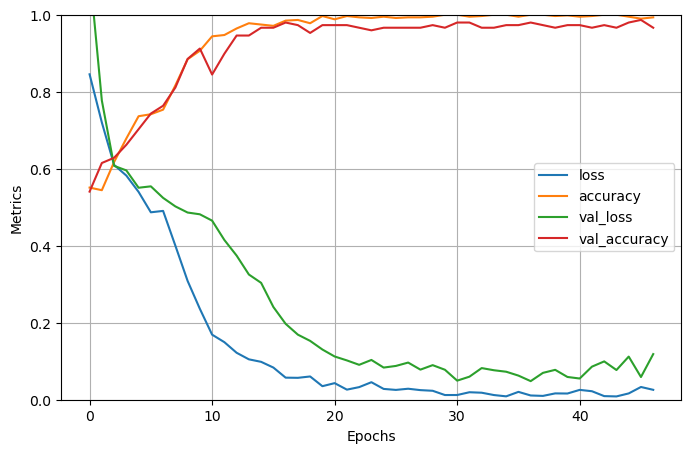

In [22]:
# PLOTIING THE HISTORY OF THE MODEL
pd.DataFrame(hist_cnn.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.xlabel('Epochs')
plt.ylabel('Metrics')
plt.show()

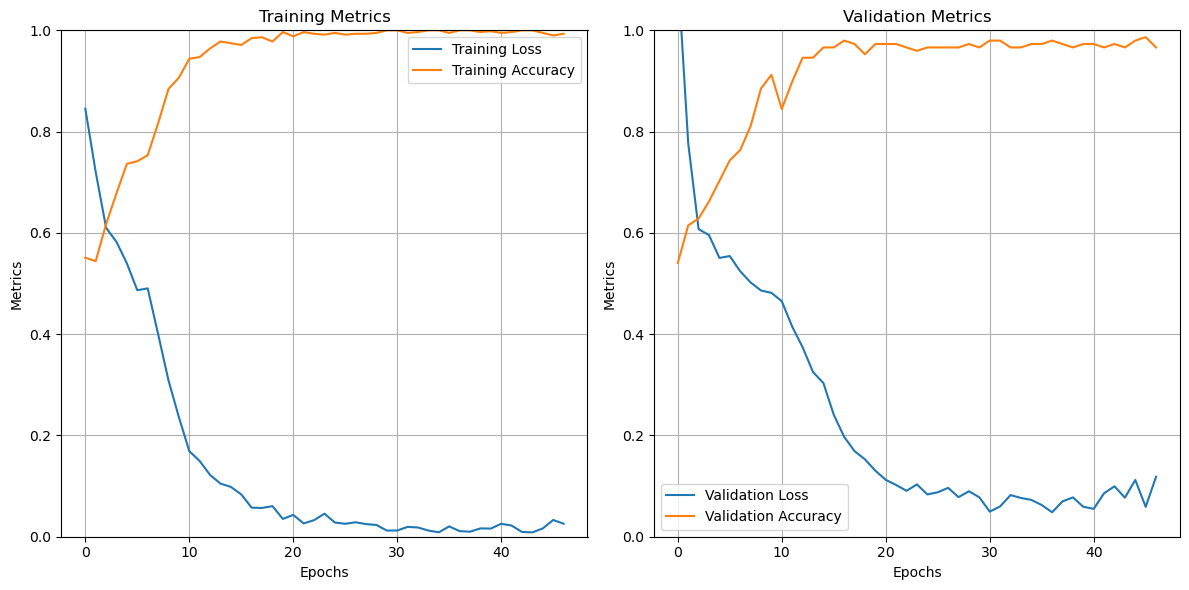

In [23]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming hist_cnn is your training history object
history = hist_cnn.history

# Convert history to DataFrame for easier manipulation
history_df = pd.DataFrame(history)

# Plot training metrics
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history_df['loss'], label='Training Loss')
plt.plot(history_df['accuracy'], label='Training Accuracy')
plt.title('Training Metrics')
plt.xlabel('Epochs')
plt.ylabel('Metrics')
plt.legend()
plt.grid(True)
plt.ylim(0, 1)  # Adjust based on your metrics

# Plot validation metrics
plt.subplot(1, 2, 2)
plt.plot(history_df['val_loss'], label='Validation Loss')
plt.plot(history_df['val_accuracy'], label='Validation Accuracy')
plt.title('Validation Metrics')
plt.xlabel('Epochs')
plt.ylabel('Metrics')
plt.legend()
plt.grid(True)
plt.ylim(0, 1)  # Adjust based on your metrics

plt.tight_layout()
plt.show()


In [24]:
# EVALUATE RESULT
eval_test_cnn = cnn_model.evaluate(x_test,y_test)
eval_train_cnn = cnn_model.evaluate(x_train,y_train)
print(f'The Accuracy Model CNN Testing II = {round((eval_test_cnn[1]),3)} ')
print(f'The Accuracy Model CNN Training II = {round((eval_train_cnn[1]),3)} ')

19/19 [==============================] - 6s 318ms/step - loss: 0.0034 - accuracy: 1.0000
The Accuracy Model CNN Testing II = 0.957 
The Accuracy Model CNN Training II = 1.0 


In [25]:
# PREDICTING RESULT
y_cnn_pred_test=cnn_model.predict(x_test)

6/6 [==============================] - 3s 284ms/step


Text(83.22222222222221, 0.5, 'Actual')

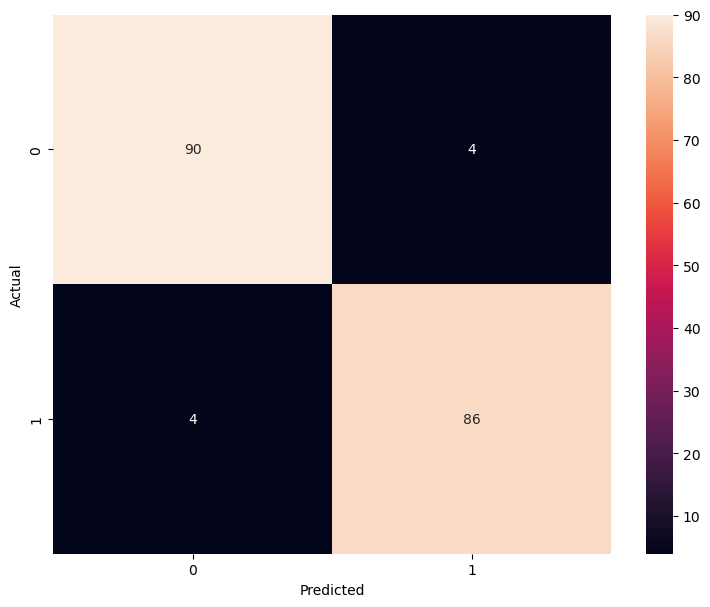

In [26]:
# DISPLAYING THE CONFUSION MATRIX
y_cnn_pred_test_list = []

for ele in y_cnn_pred_test:
  if ele > 0.5:
    y_cnn_pred_test_list.append(1)
  else :
    y_cnn_pred_test_list.append(0)
cm_cnn = tf.math.confusion_matrix(labels=y_test, predictions=y_cnn_pred_test_list)

plt.figure(figsize=(9,7))
sns.heatmap(cm_cnn,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [27]:
from sklearn.metrics import classification_report

# Generate the classification report
report = classification_report(y_test, y_cnn_pred_test_list, target_names=['Class 0', 'Class 1'])

# Print the report
print(report)

              precision    recall  f1-score   support

     Class 0       0.96      0.96      0.96        94
     Class 1       0.96      0.96      0.96        90

    accuracy                           0.96       184
   macro avg       0.96      0.96      0.96       184
weighted avg       0.96      0.96      0.96       184



In this first CNN model, we can see that the model accuracy is quite good in comparison to the validation accuracy. Despite that, the validation loss fluctuate a lot. Although the model is learning quite efficiently, the validation loss fluctuation is a consideration that the model need improvement.



#### **Conclusion**

In conclusion, we decided to choose CNN model as our best model, since it showed a good-fit model and perform the best prediction out of all our model, with only 4 wrong predicition. We will be using this CNN model as the basis model of our prediction.

# IX. Model Saving

In [28]:
# SUMMARIZING THE MODEL
cnn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 84, 84, 16)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 84, 84, 16)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 82, 82, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 41, 41, 32)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 41, 41, 32)        0

In [29]:
# FREEZE THE MODEL
cnn_model.trainable=False

In [30]:
# MODEL SAVING
cnn_model.save("signature_model.h5")

# IX. Model Inference

In [31]:
# DISPLAY INFERENCE ARRAY
x_inf.shape

(10, 256, 256, 3)

In [32]:
# PREDICTING WITH CNN MODEL
x_inf_final = cnn_model.predict(x_inf,verbose=0)

In [33]:
# Predict with vgg Model
y_pred_inf = cnn_model.predict(x_inf, verbose=0)

In [34]:
# PREDICT THE CLASS OF Y_PRED_INF
y_pred_inf_2 = ((y_pred_inf > 0.5)+0).ravel()
y_pred_inf_2

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 0])

In [35]:
# PREDICT
y_inf['CNN Prediction'] = y_pred_inf_2
y_inf

,labels,CNN Prediction
4,0,0
272,0,0
350,0,0
105,0,0
130,0,0
222,0,0
136,0,0
506,1,1
665,1,1
328,0,0


From the result of this inference data, we can see that the CNN Model that we chose as our best model did worked with 100% accuracy in prediction of new data. Despite that, since we have only little value of inference data here, the result of the prediction accuracy can change with new datas, especially in big amount.

In [36]:
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img, img_to_array
def predict_signature(image_path, model):
    # Load the image from the given path, resize it to the size used in training
    img = load_img(image_path, target_size=(256, 256))  # Ensure this matches your model's input size
    img_array = img_to_array(img)
    
    # Normalize the image to match the preprocessing used in training (e.g., division by 255)
    img_array = img_array / 255.0
    
    # Expand dimensions to match the model's expected input shape: (1, 256, 256, 3)
    img_array = np.expand_dims(img_array, axis=0)
    
    # Use the model to predict
    prediction = model.predict(img_array, verbose=0)
    
    # Since you used sigmoid activation and binary classification
    predicted_class = (prediction > 0.5).astype(int)
    
    if predicted_class == 0:
        return "Real Signature"
    else:
        return "Forged Signature"


In [37]:
image_path = r'C:/Users/logav/Downloads/Signature/test/real/NFI-01703017.png'  
result = predict_signature(image_path, cnn_model)
print("Prediction:", result)


Prediction: Real Signature
